In [46]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=BOOTCAMPDA\SERVER1;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

In [48]:
cursor = conn.cursor()

In [49]:
query = 'SELECT JobTitle, AVG(SickLeaveHours) AS Average_SickLeaveHours FROM HumanResources.Employee GROUP BY JobTitle ORDER BY Average_SickLeaveHours'
query2 = 'SELECT JobTitle, OrganizationLevel, AVG(SickLeaveHours) AS Average_SickLeaveHours FROM HumanResources.Employee WHERE OrganizationLevel IS NOT NULL GROUP BY JobTitle, OrganizationLevel ORDER BY OrganizationLevel'

In [50]:
employeedata = pd.read_sql(query, conn)
employeedata2 = pd.read_sql(query2, conn)

C:\Users\yusuf\AppData\Local\Temp\ipykernel_14940\996603940.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employeedata = pd.read_sql(query, conn)
C:\Users\yusuf\AppData\Local\Temp\ipykernel_14940\996603940.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employeedata2 = pd.read_sql(query2, conn)


In [51]:
print(employeedata.head())

                        JobTitle  Average_SickLeaveHours
0        Chief Financial Officer                      20
1  Vice President of Engineering                      20
2         Senior Design Engineer                      21
3            Engineering Manager                      21
4                Design Engineer                      22


In [52]:
bottom_10_data = employeedata.head(10)
top_10_data = employeedata.tail(10)

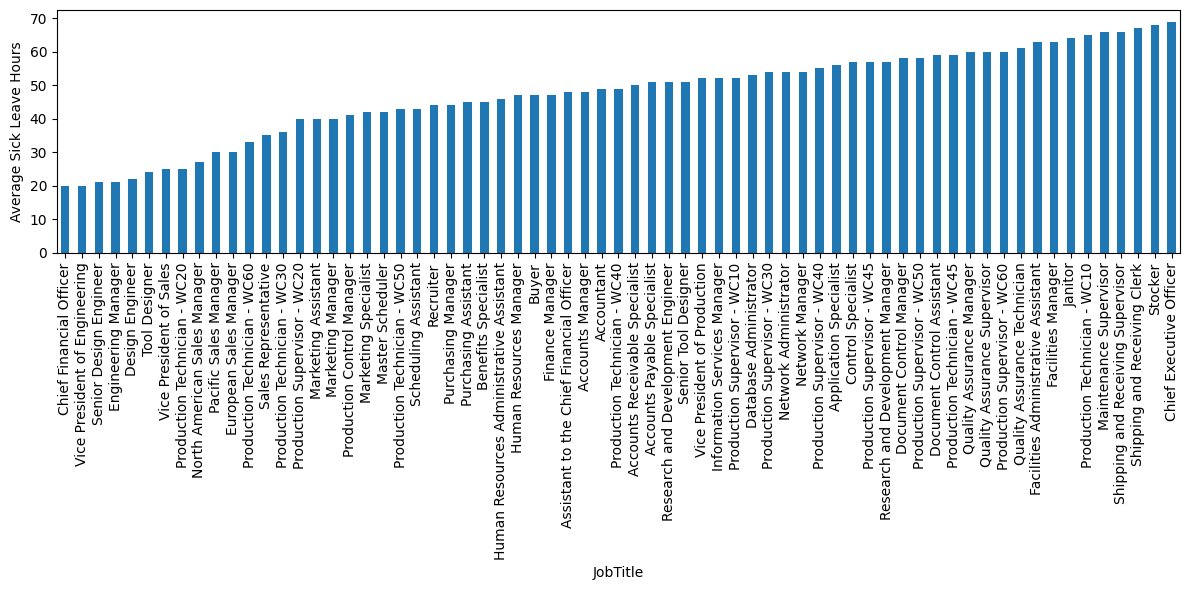

In [53]:
employeedata.plot.bar(x='JobTitle',y='Average_SickLeaveHours', figsize=(12, 6), legend=False)
plt.ylabel('Average Sick Leave Hours')
plt.tight_layout()

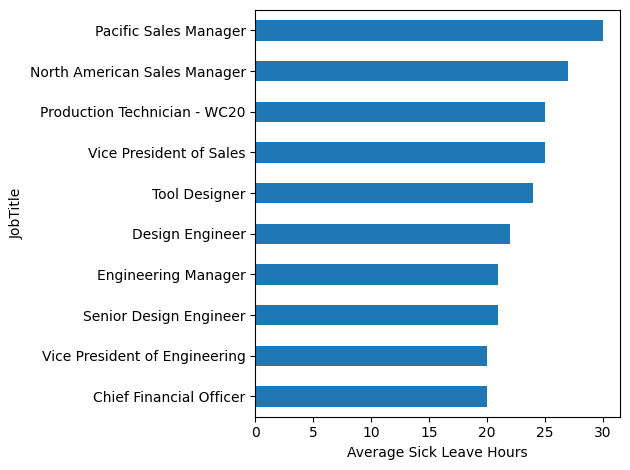

In [54]:
bottom_10_data.plot.barh(x='JobTitle', y='Average_SickLeaveHours', legend=False)
plt.xlabel('Average Sick Leave Hours')
plt.tight_layout()

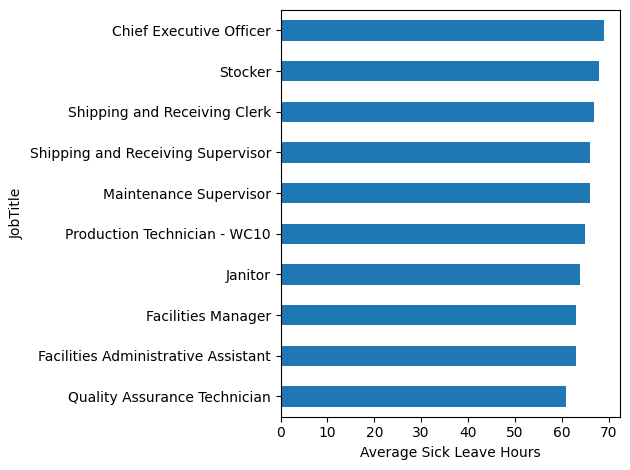

In [55]:
top_10_data.plot.barh(x='JobTitle', y='Average_SickLeaveHours', legend=False)
plt.xlabel('Average Sick Leave Hours')
plt.tight_layout()

In [56]:
print(employeedata2[['OrganizationLevel', 'Average_SickLeaveHours']])

    OrganizationLevel  Average_SickLeaveHours
0                   1                      20
1                   1                      52
2                   1                      40
3                   1                      20
4                   1                      52
..                ...                     ...
62                  4                      51
63                  4                      64
64                  4                      67
65                  4                      68
66                  4                      24

[67 rows x 2 columns]


In [57]:
mean_value=employeedata2.groupby('OrganizationLevel')['Average_SickLeaveHours'].mean()
print(mean_value)

OrganizationLevel
1    34.833333
2    44.058824
3    49.769231
4    50.944444
Name: Average_SickLeaveHours, dtype: float64


In [58]:
h=['1','2','3','4']
v=[34.83, 44.06, 49.77, 50.94]

Text(0, 0.5, 'Average Sick Leave Hours')

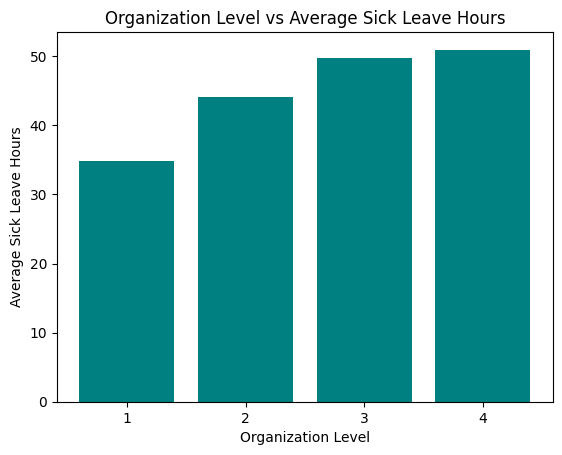

In [59]:
plt.bar(h,v, color='Teal')
plt.title('Organization Level vs Average Sick Leave Hours')
plt.xlabel('Organization Level')
plt.ylabel('Average Sick Leave Hours')

In [60]:
plt.show()